In [1]:
import numpy as np
import pandas as pd

In [2]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate student data
num_students = 100
students = np.arange(1, num_students + 1)
grades = np.random.normal(75, 10, num_students)
attendance = np.random.uniform(0.6, 1.0, num_students)
participation = np.random.normal(0.5, 0.2, num_students)

In [3]:
# Additional features
hours_studied = np.random.uniform(5, 20, num_students)
extracurricular_activities = np.random.randint(0, 10, num_students)
midterm_exam = np.random.normal(70, 5, num_students)

In [4]:
# Create DataFrame
df = pd.DataFrame({
    'Student_ID': students,
    'Grades': grades,
    'Attendance': attendance,
    'Participation': participation,
    'Hours_Studied': hours_studied,
    'Extracurricular_Activities': extracurricular_activities,
    'Midterm_Exam': midterm_exam
})

In [5]:
# Introduce missing values
missing_percentage = 0.1
missing_mask = np.random.rand(num_students, len(df.columns)) < missing_percentage
df[missing_mask] = np.nan

In [6]:
# Introduce outliers
outlier_percentage = 0.05
outlier_columns = ['Grades', 'Attendance', 'Participation', 'Hours_Studied', 'Midterm_Exam']
outlier_mask = np.random.rand(num_students) < outlier_percentage
df.loc[outlier_mask, outlier_columns] += np.random.uniform(-20, 20, (sum(outlier_mask), len(outlier_columns)))

In [7]:
# Display the generated dataset with more columns
df

,Student_ID,Grades,Attendance,Participation,Hours_Studied,Extracurricular_Activities,Midterm_Exam
0,1.0,79.967142,0.766964,0.502600,6.058531,6.0,66.778624
1,2.0,NaN,0.688843,0.790707,14.636289,2.0,NaN
2,3.0,NaN,0.647946,NaN,NaN,1.0,66.301906
3,4.0,90.230299,0.735046,NaN,13.786634,9.0,66.753764
4,5.0,72.658466,0.977164,0.625133,19.103454,3.0,65.757397
...,...,...,...,...,...,...,...
95,96.0,60.364851,0.697596,0.212828,6.252511,4.0,66.879916
96,97.0,NaN,0.989204,NaN,16.657204,6.0,72.007803
97,98.0,NaN,0.757239,0.502047,13.376064,4.0,78.234745
98,99.0,75.051135,0.956819,0.303698,11.363330,4.0,77.397170


In [8]:
df.isna().sum()

Student_ID                     6
Grades                        14
Attendance                     6
Participation                 11
Hours_Studied                  9
Extracurricular_Activities    12
Midterm_Exam                  13
dtype: int64

In [9]:
df1=df.dropna()

In [10]:
df1.isna().sum()

Student_ID                    0
Grades                        0
Attendance                    0
Participation                 0
Hours_Studied                 0
Extracurricular_Activities    0
Midterm_Exam                  0
dtype: int64

In [11]:
df.shape

(100, 7)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Student_ID                  94 non-null     float64
 1   Grades                      86 non-null     float64
 2   Attendance                  94 non-null     float64
 3   Participation               89 non-null     float64
 4   Hours_Studied               91 non-null     float64
 5   Extracurricular_Activities  88 non-null     float64
 6   Midterm_Exam                87 non-null     float64
dtypes: float64(7)
memory usage: 5.6 KB


In [13]:
df.describe()

,Student_ID,Grades,Attendance,Participation,Hours_Studied,Extracurricular_Activities,Midterm_Exam
count,94.000000,86.000000,94.000000,89.000000,91.000000,88.000000,87.000000
mean,49.776596,74.412809,1.129617,0.765191,13.074448,4.363636,70.773865
std,29.339010,9.048101,2.282554,2.318952,5.614556,2.796475,6.892740
min,1.000000,55.124311,0.602025,-5.547939,-3.838798,0.000000,52.609154
25%,24.250000,68.985604,0.697016,0.341496,9.229170,2.000000,66.826217
50%,48.500000,74.572463,0.806177,0.512856,13.601568,4.000000,71.138012
75%,74.750000,80.943972,0.883956,0.642800,17.077368,7.000000,74.065012
max,100.000000,93.522782,17.638398,20.102812,35.797094,9.000000,99.893618


# Detecting outliers using Boxplot

In [14]:
!pip install seaborn

<Axes: >

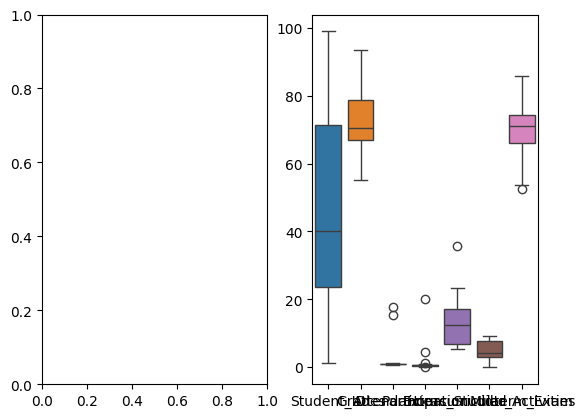

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
fig, axes= plt.subplots(1,2)
sns.boxplot(df1)

<Axes: ylabel='Hours_Studied'>

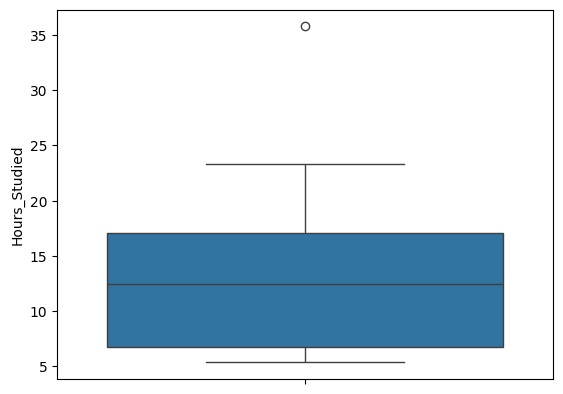

In [16]:
sns.boxplot(df1["Hours_Studied"])

# Detecting outliers using IQR

In [17]:
Q1 = df['Grades'].quantile(0.25)
Q3 = df['Grades'].quantile(0.75)
q1 = df['Attendance'].quantile(0.25)
q3 = df['Attendance'].quantile(0.75)

In [18]:
iqr = Q3 - Q1 #Interquartile range
iqr2= q3 -q1
minm= Q1 - (1.5*iqr)
maxm = Q3 + (1.5*iqr)
minm2 = q1 - (1.5*iqr2)
maxm2 = q3 + (1.5*iqr2)
iqr

11.958368591788911

In [19]:
iqr2

0.18694011650242004

In [20]:
minm

51.04805079579914

In [21]:
maxm

98.88152516295479

In [22]:
minm2

0.41660537103772843

In [23]:
maxm2

1.1643658370474086

# Removing the outliers


In [24]:
df2=df[(df['Grades']>minm) & (df['Grades']<maxm)]
df2

,Student_ID,Grades,Attendance,Participation,Hours_Studied,Extracurricular_Activities,Midterm_Exam
0,1.0,79.967142,0.766964,0.502600,6.058531,6.0,66.778624
3,4.0,90.230299,0.735046,NaN,13.786634,9.0,66.753764
4,5.0,72.658466,0.977164,0.625133,19.103454,3.0,65.757397
5,6.0,72.658630,0.729281,0.328568,13.632113,7.0,NaN
6,7.0,90.792128,0.807516,0.285822,10.822549,8.0,71.665866
...,...,...,...,...,...,...,...
93,94.0,71.723379,0.747086,0.526148,16.300673,5.0,63.461715
94,95.0,62.626342,NaN,6.808721,21.251528,2.0,99.893618
95,96.0,60.364851,0.697596,0.212828,6.252511,4.0,66.879916
98,99.0,75.051135,0.956819,0.303698,11.363330,4.0,77.397170


In [25]:
df3=df2[(df2['Attendance']>minm2) & (df2['Attendance']<maxm2)]
df3

,Student_ID,Grades,Attendance,Participation,Hours_Studied,Extracurricular_Activities,Midterm_Exam
0,1.0,79.967142,0.766964,0.502600,6.058531,6.0,66.778624
3,4.0,90.230299,0.735046,NaN,13.786634,9.0,66.753764
4,5.0,72.658466,0.977164,0.625133,19.103454,3.0,65.757397
5,6.0,72.658630,0.729281,0.328568,13.632113,7.0,NaN
6,7.0,90.792128,0.807516,0.285822,10.822549,8.0,71.665866
...,...,...,...,...,...,...,...
92,93.0,67.979469,0.637470,0.411991,19.790016,4.0,76.715494
93,94.0,71.723379,0.747086,0.526148,16.300673,5.0,63.461715
95,96.0,60.364851,0.697596,0.212828,6.252511,4.0,66.879916
98,99.0,75.051135,0.956819,0.303698,11.363330,4.0,77.397170


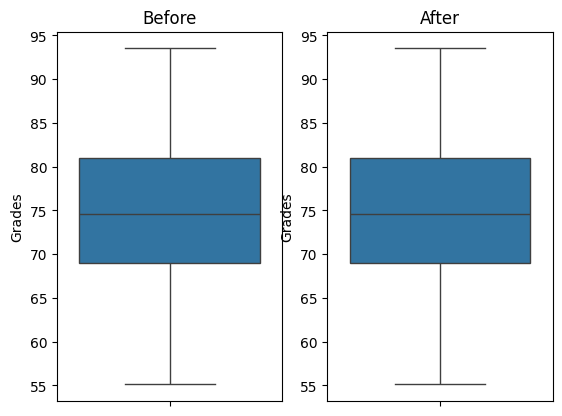

In [26]:
warnings.filterwarnings("ignore")
fig, axes= plt.subplots(1,2)

sns.boxplot(df['Grades'],ax=axes[0])
axes[0].title.set_text('Before')
sns.boxplot(df2['Grades'],ax=axes[1])
axes[1].title.set_text('After')
plt.show()

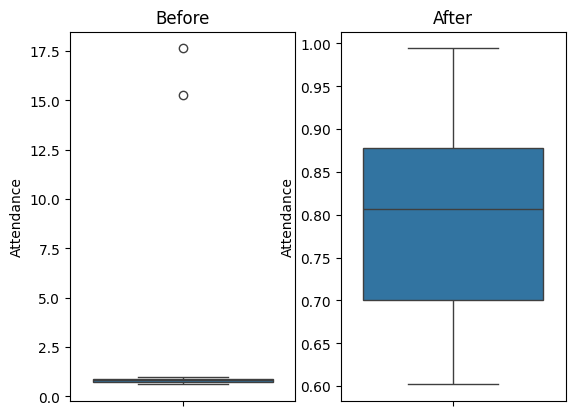

In [27]:
warnings.filterwarnings("ignore")
fig, axes= plt.subplots(1,2)

sns.boxplot(df2['Attendance'],ax=axes[0])
axes[0].title.set_text('Before')
sns.boxplot(df3['Attendance'],ax=axes[1])
axes[1].title.set_text('After')
plt.show()

# Replace Null values

In [28]:
df.mean(axis=0)

Student_ID                    49.776596
Grades                        74.412809
Attendance                     1.129617
Participation                  0.765191
Hours_Studied                 13.074448
Extracurricular_Activities     4.363636
Midterm_Exam                  70.773865
dtype: float64

In [29]:
df["Student_ID"].fillna("00", inplace = True)
df["Grades"].fillna("74.412809", inplace = True)
df["Attendance"].fillna("1.129617", inplace = True)
df["Participation"].fillna("0.765191", inplace = True)
df["Hours_Studied"].fillna("13.074448", inplace = True)
df["Extracurricular_Activities"].fillna("4.363636", inplace = True)
df["Midterm_Exam"].fillna("70.773865", inplace = True)

In [30]:
df

,Student_ID,Grades,Attendance,Participation,Hours_Studied,Extracurricular_Activities,Midterm_Exam
0,1.0,79.967142,0.766964,0.5026,6.058531,6.0,66.778624
1,2.0,74.412809,0.688843,0.790707,14.636289,2.0,70.773865
2,3.0,74.412809,0.647946,0.765191,13.074448,1.0,66.301906
3,4.0,90.230299,0.735046,0.765191,13.786634,9.0,66.753764
4,5.0,72.658466,0.977164,0.625133,19.103454,3.0,65.757397
...,...,...,...,...,...,...,...
95,96.0,60.364851,0.697596,0.212828,6.252511,4.0,66.879916
96,97.0,74.412809,0.989204,0.765191,16.657204,6.0,72.007803
97,98.0,74.412809,0.757239,0.502047,13.376064,4.0,78.234745
98,99.0,75.051135,0.956819,0.303698,11.36333,4.0,77.39717


In [31]:
from scipy.stats import norm
import statistics
import scipy.stats as stats

In [32]:
# Calculating mean and Stdev
df_mean = np.mean(df2["Grades"])
df_std = np.std(df2["Grades"])

In [33]:
# Calculating probability density function (PDF)
pdf = stats.norm.pdf(df2["Grades"].sort_values(), df_mean, df_std)

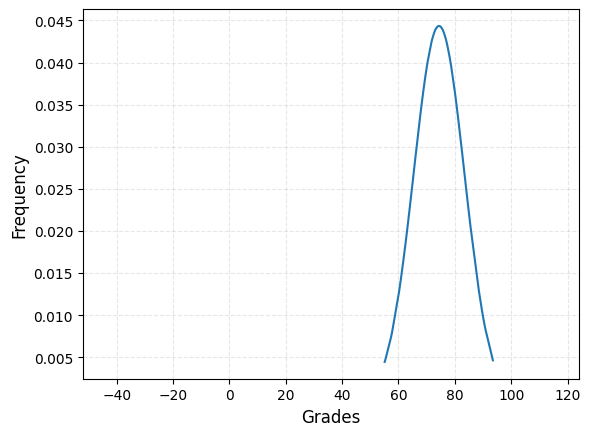

In [34]:
# Drawing a graph
plt.plot(df2["Grades"].sort_values(), pdf)
plt.xlim([-52.0,124.0]) 
plt.xlabel("Grades", size=12) 
plt.ylabel("Frequency", size=12) 
plt.grid(True, alpha=0.3, linestyle="--")
plt.show()